# Inserción en Árboles Splay

La operación de inserción en un árbol Splay es una operación crítica que no solo añade un nuevo nodo al árbol sino que también aprovecha la oportunidad para reorganizar el árbol de manera que el nodo recién insertado se mueva cerca de la raíz. Esto se alinea con la estrategia general de los árboles Splay de mantener los elementos recientemente accedidos en posiciones de fácil acceso.

## Concepto de Inserción

La inserción en un árbol Splay sigue dos pasos principales:

1. **Inserción como en un Árbol de Búsqueda Binaria (BST):** Primero, el nuevo nodo se inserta siguiendo las reglas de un BST normal. Si el valor del nuevo nodo es menor que el valor del nodo actual y el nodo actual no tiene un subárbol izquierdo, el nuevo nodo se convierte en el subárbol izquierdo del nodo actual. Si el nodo actual tiene un subárbol izquierdo, el proceso se repite recursivamente en el subárbol izquierdo. Se sigue una lógica similar para el subárbol derecho si el valor del nuevo nodo es mayor.

2. **Operación de Splay:** Después de insertar el nuevo nodo, se realiza una operación de splay sobre este nodo. Esto significa que el nodo se "splayea" o se mueve a la raíz del árbol a través de una serie de rotaciones específicas (zig, zig-zig, zig-zag), optimizando así el árbol para accesos futuros.

## Implementación en Python

In [4]:
# Código utilitario
from src.visualization import visualize_bt

In [5]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

class SplayTree:
    def __init__(self):
        self.root = None

    def rightRotate(self, x):
        y = x.left
        x.left = y.right
        y.right = x
        return y

    def leftRotate(self, x):
        y = x.right
        x.right = y.left
        y.left = x
        return y

    def splay(self, root, data):
        if root is None or root.data == data:
            return root
        if root.data > data:
            if root.left is None:
                return root
            if root.left.data > data:
                root.left.left = self.splay(root.left.left, data)
                root = self.rightRotate(root)
            elif root.left.data < data:
                root.left.right = self.splay(root.left.right, data)
                if root.left.right:
                    root.left = self.leftRotate(root.left)
            return self.rightRotate(root) if root.left else root
        else:
            if root.right is None:
                return root
            if root.right.data > data:
                root.right.left = self.splay(root.right.left, data)
                if root.right.left:
                    root.right = self.rightRotate(root.right)
            elif root.right.data < data:
                root.right.right = self.splay(root.right.right, data)
                root = self.leftRotate(root)
            return self.leftRotate(root) if root.right else root

    def insert(self, data):
        if not self.root:
            self.root = Node(data)
            return
        self.root = self.splay(self.root, data)
        if self.root.data == data:
            return
        new_node = Node(data)
        if self.root.data > data:
            new_node.right = self.root
            new_node.left = self.root.left
            self.root.left = None
        else:
            new_node.left = self.root
            new_node.right = self.root.right
            self.root.right = None
        self.root = new_node

Nodo insertado: 10
Nodo insertado: 5
Nodo insertado: 20
Nodo insertado: 9
Nodo insertado: 18
Nodo insertado: 3
Nodo insertado: 7


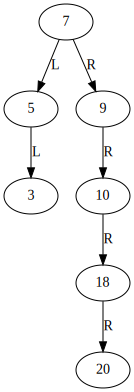

In [6]:
# Primero, asegúrate de tener definidas las clases Node y SplayTree, así como la función visualize_tree

# Creación del árbol Splay y inserción de nodos
tree = SplayTree()
keys_to_insert = [10, 5, 20, 9, 18, 3, 7]
for key in keys_to_insert:
    tree.insert(key)
    print(f"Nodo insertado: {key}")
    visualize_bt(tree)  # Esta función debería guardar una imagen del árbol después de cada inserción

# Nota: Para cada inserción, revisa las imágenes generadas (splay_tree.png) para verificar la estructura del árbol.


# Visualizar el árbol
dot = visualize_bt(tree)
display(dot)

## Complejidad del Algoritmo

- **Complejidad de Tiempo:** La inserción en un árbol Splay tiene una complejidad de tiempo amortizada de O(log n), donde n es el número de nodos en el árbol. Esto se debe a la operación de splay que ajusta el árbol después de cada inserción.

- **Complejidad de Espacio:** La complejidad del espacio es O(n) para almacenar el árbol, pero la operación de inserción en sí misma requiere un espacio constante O(1), aparte del espacio utilizado por el árbol.

## Ejercicios Prácticos

1. Modifique la implementación anterior para que el árbol mantenga un contador de los nodos insertados y pruebe su funcionamiento insertando varios nodos.
2. Implemente una función que recorra el árbol en orden y muestre los valores de los nodos para verificar que la estructura del árbol después de varias inserciones es correcta.

Estos ejercicios ayudarán a profundizar la comprensión de la dinámica de inserción en árboles Splay y cómo esta afecta la estructura del árbol.